# prediction of data

## introduction

You've seen (and used) techniques to extract general insights from a machine learning model. But what if you want to break down how the model works for an individual prediction?

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature. Where could you use this?

In [139]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split


In [140]:
import matplotlib.pyplot as plt
from shap import *
import xgboost
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

loading of all tsv, csv and excel file

In [141]:
df1=pd.read_excel("C:\\Users\\shubham kumar\\Desktop\\shap\\shap\\Hypothesis1.xlsx")

In [142]:
df1.head(5)

,Generic Group,Generic Brand,Generic Product Category,Generic Product,Generic Group variable,Generic Variable,Generic Sub-Variable,Generic LookupKey,Average revenue per existing customer,Churn,Gross,Net Migration,Data type
0,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Intentionally Blank,Consumer MarketSandesh Brand 1BroadbandTotal a...,0,0,1,0,Primary variable
1,Consumer Market,Market,Market,Total across Products,Addressable base,Existing households adding BB for first time,Intentionally Blank,Consumer MarketMarketMarketTotal across Produc...,0,0,1,0,Primary variable
2,Consumer Market,Market,Market,Total across Products,Addressable base,Immigration,Intentionally Blank,Consumer MarketMarketMarketTotal across Produc...,0,0,1,0,Primary variable
3,Consumer Market,Market,Market,Total across Products,Addressable base,New households requiring Broadband,Intentionally Blank,Consumer MarketMarketMarketTotal across Produc...,0,0,1,0,Primary variable
4,Consumer Market,Market,Market,Total across Products,Addressable base,Switchers,Intentionally Blank,Consumer MarketMarketMarketTotal across Produc...,0,0,1,0,Primary variable


In [143]:
df2=pd.read_csv("C:\\Users\\shubham kumar\\Desktop\\shap\\shap\\train.csv")

In [144]:
df2.head(5)

,Generic Group,Generic Brand,Generic Product Category,Generic Product,Variable Group,Generic Variable,Generic LookupKey,Units,Time Period,Value
0,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,14/15_Q4_Mar,0.633516
1,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,15/16_Q4_Mar,0.476024
2,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,16/17_Q4_Mar,0.324281
3,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,17/18_Q4_Mar,0.474972
4,Consumer Market,Market,Market,Total across Products,Addressable base,Existing households adding BB for first time,Consumer MarketMarketMarketTotal across Produc...,(000)s,14/15_Q4_Mar,0.512330


In [145]:
df3=pd.read_csv("C:\\Users\\shubham kumar\\Desktop\\shap\\shap\\column_meanings.tsv", delimiter="\t")

In [146]:
df3.head(5)

,Headers,Definitions
0,Generic Group,Data belonging to Sandesh Brand or Market
1,Generic Brand,Brand related
2,Generic Product Category,Market or Broadband related
3,Generic Product,"Each brand can have multiple products (Rabbit,..."
4,Variable Group,This helps you to understand to which group be...


In [147]:
df4=pd.read_csv("C:\\Users\\shubham kumar\\Desktop\\shap\\shap\\test_blank.csv")

In [148]:
df4.head(5)

,Generic Group,Generic Brand,Generic Product Category,Generic Product,Variable Group,Generic Variable,Generic LookupKey,Units,Time Period,Value
0,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,18/19_Q4_Mar,NaN
1,Consumer Market,Market,Market,Total across Products,Addressable base,Existing households adding BB for first time,Consumer MarketMarketMarketTotal across Produc...,(000)s,18/19_Q4_Mar,NaN
2,Consumer Market,Market,Market,Total across Products,Addressable base,Immigration,Consumer MarketMarketMarketTotal across Produc...,(000)s,18/19_Q4_Mar,NaN
3,Consumer Market,Market,Market,Total across Products,Addressable base,New households requiring Broadband,Consumer MarketMarketMarketTotal across Produc...,(000)s,18/19_Q4_Mar,NaN
4,Consumer Market,Market,Market,Total across Products,Addressable base,Switchers,Consumer MarketMarketMarketTotal across Produc...,(000)s,18/19_Q4_Mar,NaN


pivot the table accourdig to there rows and column value

In [150]:
p_df2=pd.pivot_table(df2, index=['Generic Group','Variable Group'], columns='Generic Brand',  values='Value',aggfunc='sum')
p1_df2=pd.pivot_table(df2, index=['Generic Group','Variable Group'], columns='Generic Product',  values='Value',aggfunc='sum')
p2_df2=pd.pivot_table(df2, index=['Generic Group','Variable Group'], columns='Generic LookupKey',  values='Value',aggfunc='sum')

In [151]:
p2_df2=pd.pivot_table(df2, index=['Generic Group','Variable Group'], columns='Generic LookupKey',  values='Value',aggfunc='sum')
p2_df2.head()

Generic LookupKey                                    Consumer MarketMarketBroadbandAllMarket Closing Base - All BB  \
Generic Group Variable Group                                                                                         
Consumer      Average revenue per existing customeR                                                NaN               
              Complaints                                                                           NaN               
              Contract info                                                                        NaN               
              Footprint                                                                            NaN               
              Marketing spend                                                                      NaN               

Generic LookupKey                                    Consumer MarketMarketBroadbandAllMarket Gross Adds - All BB  \
Generic Group Variable Group                                                                                       
Consumer      Average revenue per existing customeR                                                NaN             
              Complaints                                                                           NaN             
              Contract info                                                                        NaN             
              Footprint                                                                            NaN             
              Marketing spend                                                                      NaN             

Generic LookupKey                                    Consumer MarketMarketBroadbandAllMarket Net Adds - All BB  \
Generic Group Variable Group                                                                                     
Consumer      Average revenue per existing customeR                                                NaN           
              Complaints                                                                           NaN           
              Contract info                                                                        NaN           
              Footprint                                                                            NaN           
              Marketing spend                                                                      NaN           

Generic LookupKey                                    Consumer MarketMarketBroadbandRabbit + CheetahMarket Closing Base - Falcon  \
Generic Group Variable Group                                                                                                      
Consumer      Average revenue per existing customeR                                                NaN                            
              Complaints                                                                           NaN                            
              Contract info                                                                        NaN                            
              Footprint                                                                            NaN                            
              Marketing spend                                                                      NaN                            

Generic LookupKey                                    Consumer MarketMarketBroadbandTortoiseMarket Closing Base - Tortoise  \
Generic Group Variable Group                                                                                                
Consumer      Average revenue per existing customeR                                                NaN                      
              Complaints                                                                           NaN                      
              Contract info                                                                        NaN                      
              Foot

we will get complete discription of above datasets

In [152]:
p2_df2.describe()

Generic LookupKey,Consumer MarketMarketBroadbandAllMarket Closing Base - All BB,Consumer MarketMarketBroadbandAllMarket Gross Adds - All BB,Consumer MarketMarketBroadbandAllMarket Net Adds - All BB,Consumer MarketMarketBroadbandRabbit + CheetahMarket Closing Base - Falcon,Consumer MarketMarketBroadbandTortoiseMarket Closing Base - Tortoise,Consumer MarketMarketBroadbandTotal across ProductsRevenue - Broadband,Consumer MarketMarketMarketTotal across ProductsExisting households adding BB for first time,Consumer MarketMarketMarketTotal across ProductsImmigration,Consumer MarketMarketMarketTotal across ProductsNew households requiring Broadband,Consumer MarketMarketMarketTotal across ProductsSwitchers,...,ConsumerSandesh Brand 2BroadbandFalconBrand NPS at product level Falcon,ConsumerSandesh Brand 2BroadbandRabbitAcquisition Price - High Rabbit (Speed 9 to Speed 11),ConsumerSandesh Brand 2BroadbandRabbitAcquisition Price - Low Rabbit (Speed 3 to Speed 4),ConsumerSandesh Brand 2BroadbandTortoiseAcquisition Price - Tortoise (Up to Speed 2),ConsumerSandesh Brand 2BroadbandTortoiseBrand NPS at product level Tortoise,ConsumerSandesh Brand 3BroadbandFalconBrand NPS at product level Falcon,ConsumerSandesh Brand 3BroadbandRabbitAcquisition Price - High Rabbit (Speed 9 to Speed 11),ConsumerSandesh Brand 3BroadbandRabbitAcquisition Price - Low Rabbit (Speed 3 to Speed 4),ConsumerSandesh Brand 3BroadbandTortoiseAcquisition Price - Tortoise (Up to Speed 2),ConsumerSandesh Brand 3BroadbandTortoiseBrand NPS at product level Tortoise
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0000
mean,3.227013,7.397039,6.446882,1.706002,1.351304,4.353523,1.788183,1.725845,1.957893,0.713508,...,5.402446,5.920276,5.212395,5.864564,0.333618,6.726908,5.843669,5.254066,5.75517,6.4323
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.227013,7.397039,6.446882,1.706002,1.351304,4.353523,1.788183,1.725845,1.957893,0.713508,...,5.402446,5.920276,5.212395,5.864564,0.333618,6.726908,5.843669,5.254066,5.75517,6.4323
25%,3.227013,7.397039,6.446882,1.706002,1.351304,4.353523,1.788183,1.725845,1.957893,0.713508,...,5.402446,5.920276,5.212395,5.864564,0.333618,6.726908,5.843669,5.254066,5.75517,6.4323
50%,3.227013,7.397039,6.446882,1.706002,1.351304,4.353523,1.788183,1.725845,1.957893,0.713508,...,5.402446,5.920276,5.212395,5.864564,0.333618,6.726908,5.843669,5.254066,5.75517,6.4323
75%,3.227013,7.397039,6.446882,1.706002,1.351304,4.353523,1.788183,1.725845,1.957893,0.713508,...,5.402446,5.920276,5.212395,5.864564,0.333618,6.726908,5.843669,5.254066,5.75517,6.4323
max,3.227013,7.397039,6.446882,1.706002,1.351304,4.353523,1.788183,1.725845,1.957893,0.713508,...,5.402446,5.920276,5.212395,5.864564,0.333618,6.726908,5.843669,5.254066,5.75517,6.4323


In [153]:
#repalce NaN value by 0
p_df2.head(5)
p_df2.fillna(0, inplace=True)

In [154]:
p_df2.head()

Generic Brand                                        Market  \
Generic Group Variable Group                                  
Consumer      Average revenue per existing customeR     0.0   
              Complaints                                0.0   
              Contract info                             0.0   
              Footprint                                 0.0   
              Marketing spend                           0.0   

Generic Brand                                        Non Sandesh Brand 10  \
Generic Group Variable Group                                                
Consumer      Average revenue per existing customeR                   0.0   
              Complaints                                              0.0   
              Contract info                                           0.0   
              Footprint                                               0.0   
              Marketing spend                                         0.0   

Generic Brand                                        Non Sandesh Brand 4  \
Generic Group Variable Group                                               
Consumer      Average revenue per existing customeR                  0.0   
              Complaints                                             0.0   
              Contract info                                          0.0   
              Footprint                                              0.0   
              Marketing spend                                        0.0   

Generic Brand                                        Non Sandesh Brand 5  \
Generic Group Variable Group                                               
Consumer      Average revenue per existing customeR                  0.0   
              Complaints                                             0.0   
              Contract info                                          0.0   
              Footprint                                              0.0   
              Marketing spend                                        0.0   

Generic Brand                                        Non Sandesh Brand 8  \
Generic Group Variable Group                                               
Consumer      Average revenue per existing customeR             0.000000   
              Complaints                                        0.000000   
              Contract info                                     0.000000   
              Footprint                                         8.800692   
              Marketing spend                                   0.000000   

Generic Brand                                        Non Sandesh Brand 9  \
Generic Group Variable Group                                               
Consumer      Average revenue per existing customeR                  0.0   
              Complaints                                             0.0   
              Contract info                                          0.0   
              Footprint                                              0.0   
              Marketing spend                                        0.0   

Generic Brand                                        Sandesh Brand 1  \
Generic Group Variable Group                                           
Consumer      Average revenue per existing customeR        38.073853   
              Complaints                                   14.063731   
              Contract info                                 9.861335   
              Footprint                                    16.158154   
              Marketing spend                              35.383251   

Generic Brand                                        Sandesh Brand 1  and Non Sandesh Brand 4   \
Generic Group Variable Group                                                                     
Consumer      Average revenue per existing customeR                                        0.0   
              Complaints                                                               

In [155]:
p1_df2.head()

Generic Product                                            All    Cheetah  \
Generic Group Variable Group                                                
Consumer      Average revenue per existing customeR        NaN  10.836289   
              Complaints                             14.063731        NaN   
              Contract info                                NaN   0.606870   
              Footprint                                    NaN  15.959626   
              Marketing spend                        35.383251        NaN   

Generic Product                                      Falcon  Overall  \
Generic Group Variable Group                                           
Consumer      Average revenue per existing customeR     NaN      NaN   
              Complaints                                NaN      NaN   
              Contract info                             NaN      NaN   
              Footprint                                 NaN      NaN   
              Marketing spend                           NaN      NaN   

Generic Product                                         Rabbit  \
Generic Group Variable Group                                     
Consumer      Average revenue per existing customeR  13.433296   
              Complaints                                   NaN   
              Contract info                           4.564389   
              Footprint                               8.999221   
              Marketing spend                              NaN   

Generic Product                                      Rabbit + Cheetah  \
Generic Group Variable Group                                            
Consumer      Average revenue per existing customeR               NaN   
              Complaints                                          NaN   
              Contract info                                       NaN   
              Footprint                                           NaN   
              Marketing spend                                     NaN   

Generic Product                                       Tortoise  \
Generic Group Variable Group                                     
Consumer      Average revenue per existing customeR  13.804268   
              Complaints                                   NaN   
              Contract info                           4.690076   
              Footprint                                    NaN   
              Marketing spend                              NaN   

Generic Product                                      Total across Products  
Generic Group Variable Group                                                
Consumer      Average revenue per existing customeR                    NaN  
              Complaints                                               NaN  
              Contract info                                            NaN  
              Footprint                                                NaN  
              Marketing spend                                          NaN

In [156]:
#now trainig of pivoted  datasets with machine learning model

In [327]:
x_train, x_test, y_train ,y_test=train_test_split(x,y , test_size=20,random_state=1)

In [164]:
df2['Indx'] = range(1, len(df2) + 1)

In [165]:
x=df2['Indx'].values.reshape(-1, 1)

In [166]:
x

array([[   1],
       [   2],
       [   3],
       ...,
       [4031],
       [4032],
       [4033]])

In [167]:
y=df2['Value'].astype(str)

In [168]:
y

0        0.63351605
1       0.476024086
2        0.32428139
3       0.474971925
4       0.512329528
           ...     
4028     0.15926653
4029    0.090632129
4030    0.181350106
4031     0.12944669
4032    0.194315348
Name: Value, Length: 4033, dtype: object

In [169]:
df2.head()

,Generic Group,Generic Brand,Generic Product Category,Generic Product,Variable Group,Generic Variable,Generic LookupKey,Units,Time Period,Value,Indx
0,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,14/15_Q4_Mar,0.633516,1
1,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,15/16_Q4_Mar,0.476024,2
2,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,16/17_Q4_Mar,0.324281,3
3,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,17/18_Q4_Mar,0.474972,4
4,Consumer Market,Market,Market,Total across Products,Addressable base,Existing households adding BB for first time,Consumer MarketMarketMarketTotal across Produc...,(000)s,14/15_Q4_Mar,0.512330,5


In [170]:
x_train, x_test, y_train ,y_test=train_test_split(x,y , test_size=20,random_state=1)

In [171]:
x_train

array([[ 679],
       [1141],
       [3142],
       ...,
       [3981],
       [ 236],
       [1062]])

In [172]:
y_train

678              0.147292697
1140    0.052201724000000005
3141    0.033949612000000004
3549    -0.12347539099999999
854     0.025197392000000002
                ...         
3839             0.132498913
1096              0.21428486
3980     0.16266497800000002
235              0.229322208
1061     0.18505540899999998
Name: Value, Length: 4013, dtype: object

# Code to Calculate SHAP Values

We calculate SHAP values using the wonderful Shap library.

In [173]:
model=model=RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)

In [174]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [175]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [176]:
shap_values=shap.TreeExplainer(model).shap_values(x_train)

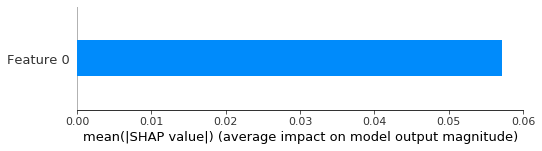

In [177]:
shap.summary_plot(shap_values, x_train, plot_type='bar')

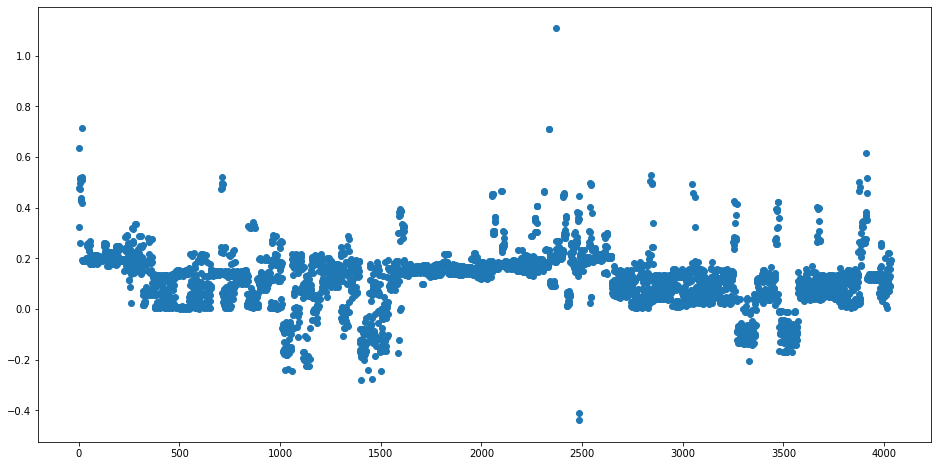

In [178]:
fig, ax = plt.subplots(1, figsize=(16, 8))

ax.scatter(df2['Indx'], df2["Value"])

In [179]:
y2=p_df2['Sandesh Brand 1']

In [180]:
p_df2.describe()

Generic Brand,Market,Non Sandesh Brand 10,Non Sandesh Brand 4,Non Sandesh Brand 5,Non Sandesh Brand 8,Non Sandesh Brand 9,Sandesh Brand 1,Sandesh Brand 1 and Non Sandesh Brand 4,Sandesh Brand 1 and Market,Sandesh Brand 2,Sandesh Brand 3
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2.044480,0.298844,1.891432,0.998908,2.333265,1.738589,17.479540,0.679541,0.984482,1.798812,2.000808
std,5.342955,1.157417,5.147585,5.429652,4.570230,5.116403,24.601646,2.631853,2.610689,5.579070,5.326059
min,0.000000,0.000000,0.000000,-5.067019,0.000000,0.000000,-0.406519,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.076865,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,2.107171,0.000000,20.156266,0.000000,0.000000,0.000000,0.000000
max,20.128240,4.482656,17.514338,20.050641,15.305913,19.029983,93.761098,10.193121,8.062699,21.246122,16.852906


In [181]:
x2=p_df2[['Market',
'Non Sandesh Brand 10',
'Non Sandesh Brand 4',
'Non Sandesh Brand 5',
'Non Sandesh Brand 8',
'Non Sandesh Brand 9',
'Sandesh Brand 1 and Market',
'Sandesh Brand 2',
'Sandesh Brand 3'










]]

In [182]:
model=model=RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)

In [183]:
x_train1, x_test1, y_train1 ,y_test1=train_test_split(x2,y2 , test_size=.20,random_state=1)

In [184]:
x_train1

Generic Brand                                             Market  \
Generic Group   Variable Group                                     
Consumer        Contract info                           0.000000   
Consumer Market Addressable base                        6.185429   
Consumer        Marketing spend                         0.000000   
                Complaints                              0.000000   
Consumer Market Revenue                                 4.353523   
Consumer        Average revenue per existing customeR   0.000000   
Consumer Market Volume                                 20.128240   
Consumer        Volume                                  0.000000   
                TV                                      0.000000   
Consumer Market Price                                   0.000000   
                Footprint                               0.000000   
Consumer        NPS                                     0.000000   

Generic Brand                                          Non Sandesh Brand 10  \
Generic Group   Variable Group                                                
Consumer        Contract info                                      0.000000   
Consumer Market Addressable base                                   0.000000   
Consumer        Marketing spend                                    0.000000   
                Complaints                                         0.000000   
Consumer Market Revenue                                            0.000000   
Consumer        Average revenue per existing customeR              0.000000   
Consumer Market Volume                                             0.000000   
Consumer        Volume                                             0.000000   
                TV                                                 0.000000   
Consumer Market Price                                              0.000000   
                Footprint                                          4.482656   
Consumer        NPS                                                0.000000   

Generic Brand                                          Non Sandesh Brand 4  \
Generic Group   Variable Group                                               
Consumer        Contract info                                     0.000000   
Consumer Market Addressable base                                  0.000000   
Consumer        Marketing spend                                   0.000000   
                Complaints                                        0.000000   
Consumer Market Revenue                                           0.000000   
Consumer        Average revenue per existing customeR             0.000000   
Consumer Market Volume                                            0.000000   
Consumer        Volume                                            0.000000   
                TV                                                0.000000   
Consumer Market Price                                            17.514338   
                Footprint                                         0.000000   
Consumer        NPS                                              10.857145   

Generic Brand                                          Non Sandesh Brand 5  \
Generic Group   Variable Group                                               
Consumer        Contract info                                     0.000000   
Consumer Market Addressable base                                  0.000000   
Consumer        Marketing spend                                   0.000000   
                Complaints                                        0.000000   
Consumer Market Revenue                                           0.000000   
Consumer        Average revenue per existing customeR             0.000000   
Consumer Market Volume                                            0.000000   
Consumer        Volume                                            0.000000   
                TV                                                0

In [185]:
model.fit(x_train1 , y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [186]:
shap_values1=shap.TreeExplainer(model).shap_values(x_train1)

# Summer plot

The SHAP value plot can further show the positive and negative relationships of the predictors with the target variable. The code

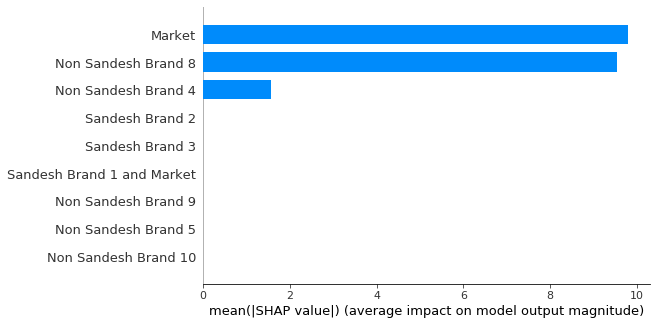

In [187]:
shap.summary_plot(shap_values1, x_train1, plot_type='bar')

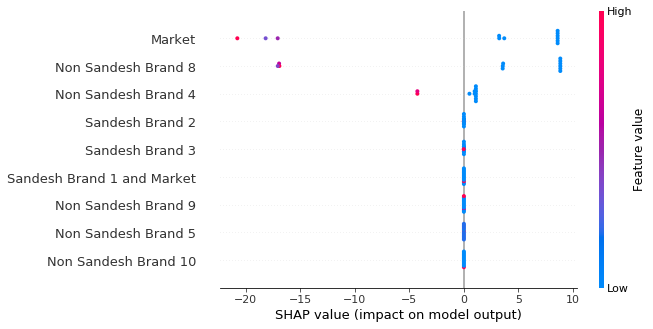

In [188]:
shap.summary_plot(shap_values1, x_train1)

In [ ]:
#replacing NaN value by 0

In [189]:
p1_df2.fillna(0, inplace=True)

In [190]:
p1_df2.head()

Generic Product                                            All    Cheetah  \
Generic Group Variable Group                                                
Consumer      Average revenue per existing customeR   0.000000  10.836289   
              Complaints                             14.063731   0.000000   
              Contract info                           0.000000   0.606870   
              Footprint                               0.000000  15.959626   
              Marketing spend                        35.383251   0.000000   

Generic Product                                      Falcon  Overall  \
Generic Group Variable Group                                           
Consumer      Average revenue per existing customeR     0.0      0.0   
              Complaints                                0.0      0.0   
              Contract info                             0.0      0.0   
              Footprint                                 0.0      0.0   
              Marketing spend                           0.0      0.0   

Generic Product                                         Rabbit  \
Generic Group Variable Group                                     
Consumer      Average revenue per existing customeR  13.433296   
              Complaints                              0.000000   
              Contract info                           4.564389   
              Footprint                               8.999221   
              Marketing spend                         0.000000   

Generic Product                                      Rabbit + Cheetah  \
Generic Group Variable Group                                            
Consumer      Average revenue per existing customeR               0.0   
              Complaints                                          0.0   
              Contract info                                       0.0   
              Footprint                                           0.0   
              Marketing spend                                     0.0   

Generic Product                                       Tortoise  \
Generic Group Variable Group                                     
Consumer      Average revenue per existing customeR  13.804268   
              Complaints                              0.000000   
              Contract info                           4.690076   
              Footprint                               0.000000   
              Marketing spend                         0.000000   

Generic Product                                      Total across Products  
Generic Group Variable Group                                                
Consumer      Average revenue per existing customeR                    0.0  
              Complaints                                               0.0  
              Contract info                                            0.0  
              Footprint                                                0.0  
              Marketing spend                                          0.0

In [191]:
y3=p1_df2['Rabbit']

In [192]:
x3=p1_df2[[
    'All',
'Cheetah',
'Falcon',
'Overall',
'Rabbit',
'Rabbit + Cheetah',
'Tortoise',
'Total across Products'
]]

In [193]:
x_train3, x_test3, y_train3 ,y_test3=train_test_split(x3,y3 , test_size=.20,random_state=1)

In [194]:
model.fit(x_train3 , y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [195]:
shap_values1=shap.TreeExplainer(model).shap_values(x_train3)

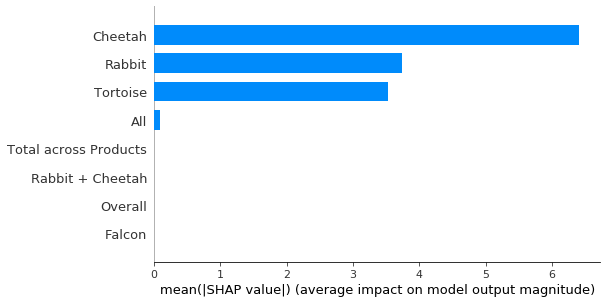

In [196]:
shap.summary_plot(shap_values1, x_train3, plot_type='bar')

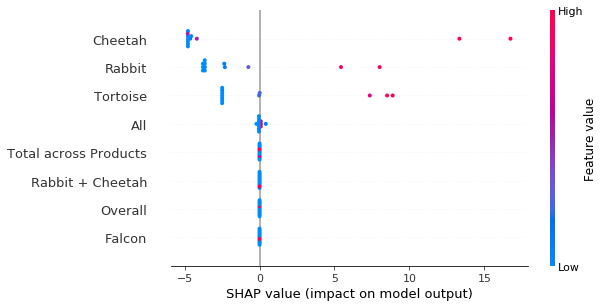

In [197]:
shap.summary_plot(shap_values1, x_train3)

In [198]:
#concatatination of two datasets

In [199]:
p_concat=pd.concat([p1_df2, p_df2], ignore_index=True, sort=False)

In [200]:
p_concat.head()

,All,Cheetah,Falcon,Overall,Rabbit,Rabbit + Cheetah,Tortoise,Total across Products,Market,Non Sandesh Brand 10,Non Sandesh Brand 4,Non Sandesh Brand 5,Non Sandesh Brand 8,Non Sandesh Brand 9,Sandesh Brand 1,Sandesh Brand 1 and Non Sandesh Brand 4,Sandesh Brand 1 and Market,Sandesh Brand 2,Sandesh Brand 3
0,0.000000,10.836289,0.0,0.0,13.433296,0.0,13.804268,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.063731,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.606870,0.0,0.0,4.564389,0.0,4.690076,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,15.959626,0.0,0.0,8.999221,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35.383251,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
p_concat.describe()

,All,Cheetah,Falcon,Overall,Rabbit,Rabbit + Cheetah,Tortoise,Total across Products,Market,Non Sandesh Brand 10,Non Sandesh Brand 4,Non Sandesh Brand 5,Non Sandesh Brand 8,Non Sandesh Brand 9,Sandesh Brand 1,Sandesh Brand 1 and Non Sandesh Brand 4,Sandesh Brand 1 and Market,Sandesh Brand 2,Sandesh Brand 3
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,4.590205,7.163840,2.359701,0.274864,11.183589,0.113733,5.732917,0.829850,2.044480,0.298844,1.891432,0.998908,2.333265,1.738589,17.479540,0.679541,0.984482,1.798812,2.000808
std,10.108635,8.496752,9.139084,1.064544,17.548248,0.440488,7.847919,2.301239,5.342955,1.157417,5.147585,5.429652,4.570230,5.116403,24.601646,2.631853,2.610689,5.579070,5.326059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.067019,0.000000,0.000000,-0.406519,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.028138,0.000000,0.000000,4.178832,0.000000,1.351304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.076865,0.000000,0.000000,0.000000,0.000000
75%,1.167578,13.347817,0.000000,0.000000,11.216258,0.000000,9.247172,0.000000,0.000000,0.000000,0.000000,0.000000,2.107171,0.000000,20.156266,0.000000,0.000000,0.000000,0.000000
max,35.383251,23.038164,35.395519,4.122961,49.654115,1.706002,21.405121,8.094223,20.128240,4.482656,17.514338,20.050641,15.305913,19.029983,93.761098,10.193121,8.062699,21.246122,16.852906


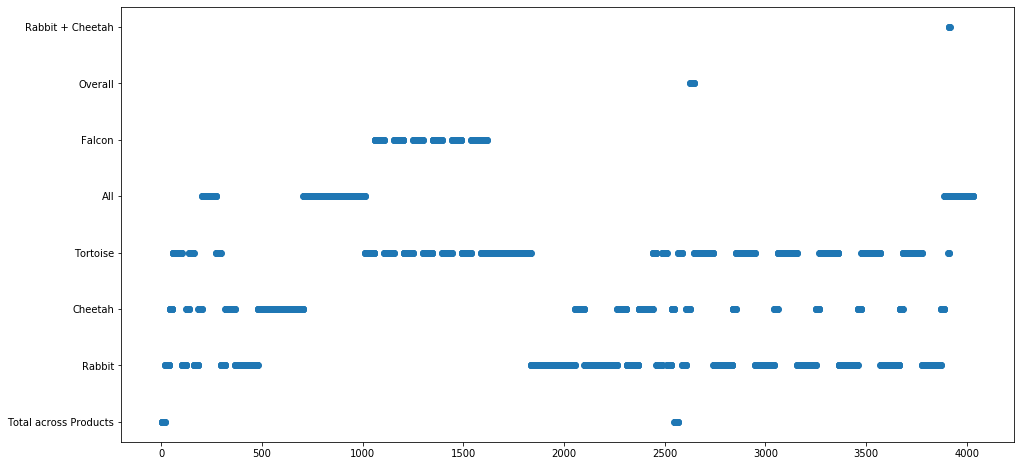

In [202]:
fig, ax = plt.subplots(1, figsize=(16, 8))

ax.scatter(df2['Indx'], df2['Generic Product'])

# Simple Dependence plot

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. In this example the log-odds of making over 50k increases significantly between age 20 and 40.

Each dot is a single prediction (row) from the dataset.
The x-axis is the value of the feature (from the X matrix).
The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction. For this model the units are log-odds of making over 50k annually.
The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring. For the example below 20-year-olds with a high level of education are less likely make over 50k than 20-year-olds with a low level of education. This suggests an interaction effect between Education-Num and Age.

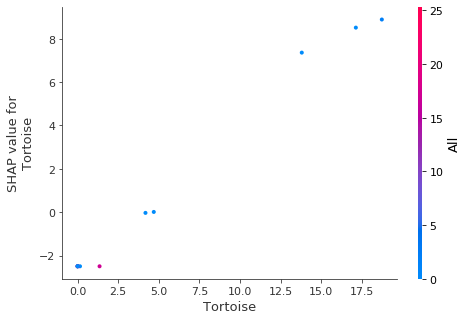

In [204]:
shap.dependence_plot("Tortoise", shap_values1, x_train3)
# The first argument is the index of the feature we want to plot
# The second argument is the matrix of SHAP values (it is the same shape as the data matrix)
# The third argument is the data matrix (a pandas dataframe or numpy array)

In [205]:
df2.head()

,Generic Group,Generic Brand,Generic Product Category,Generic Product,Variable Group,Generic Variable,Generic LookupKey,Units,Time Period,Value,Indx
0,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,14/15_Q4_Mar,0.633516,1
1,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,15/16_Q4_Mar,0.476024,2
2,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,16/17_Q4_Mar,0.324281,3
3,Consumer Market,Sandesh Brand 1,Broadband,Total across Products,Addressable base,Total Addressable Market,Consumer MarketSandesh Brand 1BroadbandTotal a...,(000)s,17/18_Q4_Mar,0.474972,4
4,Consumer Market,Market,Market,Total across Products,Addressable base,Existing households adding BB for first time,Consumer MarketMarketMarketTotal across Produc...,(000)s,14/15_Q4_Mar,0.512330,5


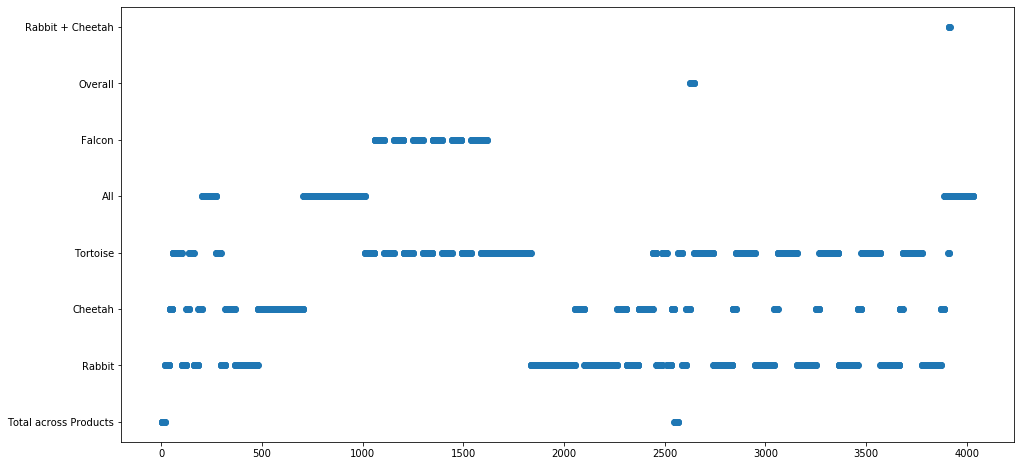

In [206]:
fig, ax = plt.subplots(1, figsize=(16, 8))

ax.scatter(df2['Indx'], df2['Generic Product'])

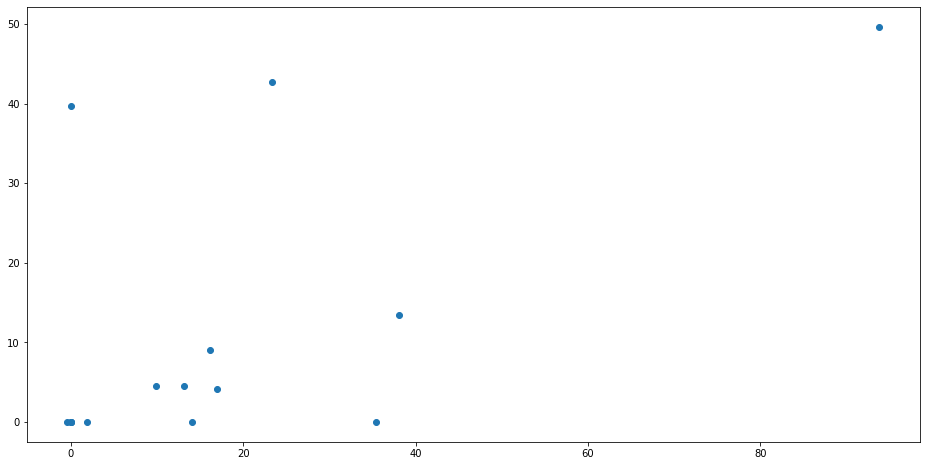

In [207]:
fig, ax = plt.subplots(1, figsize=(16, 8))

ax.scatter(y2, y3)

In [208]:
p2_df2.fillna(0, inplace=True)

In [209]:
p2_df2.head(3)

Generic LookupKey                                    Consumer MarketMarketBroadbandAllMarket Closing Base - All BB  \
Generic Group Variable Group                                                                                         
Consumer      Average revenue per existing customeR                                                0.0               
              Complaints                                                                           0.0               
              Contract info                                                                        0.0               

Generic LookupKey                                    Consumer MarketMarketBroadbandAllMarket Gross Adds - All BB  \
Generic Group Variable Group                                                                                       
Consumer      Average revenue per existing customeR                                                0.0             
              Complaints                                                                           0.0             
              Contract info                                                                        0.0             

Generic LookupKey                                    Consumer MarketMarketBroadbandAllMarket Net Adds - All BB  \
Generic Group Variable Group                                                                                     
Consumer      Average revenue per existing customeR                                                0.0           
              Complaints                                                                           0.0           
              Contract info                                                                        0.0           

Generic LookupKey                                    Consumer MarketMarketBroadbandRabbit + CheetahMarket Closing Base - Falcon  \
Generic Group Variable Group                                                                                                      
Consumer      Average revenue per existing customeR                                                0.0                            
              Complaints                                                                           0.0                            
              Contract info                                                                        0.0                            

Generic LookupKey                                    Consumer MarketMarketBroadbandTortoiseMarket Closing Base - Tortoise  \
Generic Group Variable Group                                                                                                
Consumer      Average revenue per existing customeR                                                0.0                      
              Complaints                                                                           0.0                      
              Contract info                                                                        0.0                      

Generic LookupKey                                    Consumer MarketMarketBroadbandTotal across ProductsRevenue - Broadband  \
Generic Group Variable Group                                                                                                  
Consumer      Average revenue per existing customeR                                                0.0                        
              Complaints                                                                           0.0                        
              Contract info                                                                        0.0                        

Generic LookupKey                                    Consumer MarketMarketMarketTotal across ProductsExisting households adding BB for first time  \
Generic Group Variable Group                                                                                                                        
Consumer      Average revenue per existin

In [210]:
z=df2['Generic LookupKey'].values.reshape(-1,1)

In [211]:
z

array([['Consumer MarketSandesh Brand 1BroadbandTotal across ProductsTotal Addressable Market'],
       ['Consumer MarketSandesh Brand 1BroadbandTotal across ProductsTotal Addressable Market'],
       ['Consumer MarketSandesh Brand 1BroadbandTotal across ProductsTotal Addressable Market'],
       ...,
       ['Consumer MarketMarketBroadbandAllMarket Net Adds - All BB'],
       ['Consumer MarketMarketBroadbandAllMarket Net Adds - All BB'],
       ['Consumer MarketMarketBroadbandAllMarket Net Adds - All BB']],
      dtype=object)

In [212]:
x4=p2_df2['Consumer MarketMarketBroadbandAllMarket Gross Adds - All BB'].values.reshape(-1,1)

In [213]:
y4=p2_df2[['Consumer MarketMarketBroadbandAllMarket Closing Base - All BB',
'Consumer MarketMarketBroadbandAllMarket Net Adds - All BB',
'Consumer MarketMarketBroadbandRabbit + CheetahMarket Closing Base - Falcon',
'Consumer MarketMarketBroadbandTortoiseMarket Closing Base - Tortoise',
'Consumer MarketMarketBroadbandTotal across ProductsRevenue - Broadband',
'Consumer MarketMarketMarketTotal across ProductsExisting households adding BB for first time',
'Consumer MarketMarketMarketTotal across ProductsImmigration',
'Consumer MarketMarketMarketTotal across ProductsNew households requiring Broadband',
'Consumer MarketMarketMarketTotal across ProductsSwitchers'
#'ConsumerSandesh Brand 2BroadbandFalconBrand NPS at product level Falcon'
#'ConsumerSandesh Brand 2BroadbandRabbitAcquisition Price - High Rabbit (Speed 9 to Speed 11)',
#'ConsumerSandesh Brand 2BroadbandRabbitAcquisition Price - Low Rabbit (Speed 3 to Speed 4)',
#'ConsumerSandesh Brand 2BroadbandTortoiseAcquisition Price - Tortoise (Up to Speed 2)',
#'ConsumerSandesh Brand 2BroadbandTortoiseBrand NPS at product level Tortoise',
#'ConsumerSandesh Brand 3BroadbandFalconBrand NPS at product level Falcon',
#'ConsumerSandesh Brand 3BroadbandRabbitAcquisition Price - High Rabbit (Speed 9 to Speed 11)',
#'ConsumerSandesh Brand 3BroadbandRabbitAcquisition Price - Low Rabbit (Speed 3 to Speed 4)',
#'ConsumerSandesh Brand 3BroadbandTortoiseAcquisition Price - Tortoise (Up to Speed 2)',
#'ConsumerSandesh Brand 3BroadbandTortoiseBrand NPS at product level Tortoise'
]]

In [214]:
x_train4, x_test4, y_train4 ,y_test4=train_test_split(x4,y4 , test_size=.10,random_state=1)

In [215]:
model.fit(x_train4 , y_train4)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [216]:
shap_values4=shap.TreeExplainer(model).shap_values(x_train4)

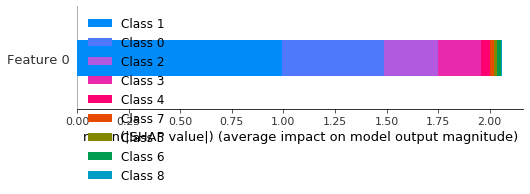

In [217]:
shap.summary_plot(shap_values4, x_train4, plot_type='bar')

In [218]:
#plot of dependence plot 

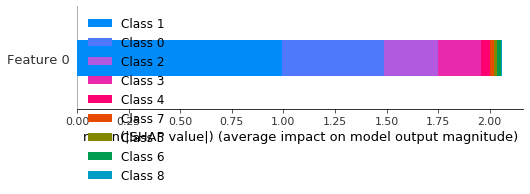

In [219]:
shap.summary_plot(shap_values4, x_train4)

In [262]:
x_output=x_test1.copy()
import numpy as np

In [264]:
x_output

Generic Brand                 Market  Non Sandesh Brand 10  \
Generic Group Variable Group                                 
Consumer      Footprint          0.0                   0.0   
              Revenue            0.0                   0.0   
              Price              0.0                   0.0   

Generic Brand                 Non Sandesh Brand 4  Non Sandesh Brand 5  \
Generic Group Variable Group                                             
Consumer      Footprint                       0.0                  0.0   
              Revenue                         0.0                  0.0   
              Price                           0.0                  0.0   

Generic Brand                 Non Sandesh Brand 8  Non Sandesh Brand 9  \
Generic Group Variable Group                                             
Consumer      Footprint                  8.800692                  0.0   
              Revenue                    0.000000                  0.0   
              Price                      0.000000                  0.0   

Generic Brand                 Sandesh Brand 1 and Market  Sandesh Brand 2  \
Generic Group Variable Group                                                
Consumer      Footprint                         0.000000         0.000000   
              Revenue                           0.000000         0.000000   
              Price                             8.062699        21.246122   

Generic Brand                 Sandesh Brand 3  
Generic Group Variable Group                   
Consumer      Footprint              0.000000  
              Revenue                0.000000  
              Price                 16.852906

In [ ]:
#drawing explainer model of regression

# Force plot

1. TreeExplainer: Support XGBoost, LightGBM, CatBoost and scikit-learn models by Tree SHAP.
2. DeepExplainer (DEEP SHAP): Support TensorFlow and Keras models by using DeepLIFT and Shapley values.
3. GradientExplainer: Support TensorFlow and Keras models.
4. KernelExplainer (Kernel SHAP): Applying to any models by using LIME and Shapley values.

In [274]:
from sklearn.ensemble import RandomForestClassifier

my_model = RandomForestClassifier(random_state=1).fit(x_train1, training_scores_encoded)

c:\users\shubham kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [272]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import utils
from shap import KernelExplainer, initjs

The output value is the prediction for that observation (the prediction of the first row in Table B is 6.20).

In [273]:

clf = LogisticRegression()
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train1)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train1))
print(utils.multiclass.type_of_target(y_train1.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))


[3 2 6 4 1 7 1 8 5 1 1 0]
continuous
multiclass
multiclass


In [258]:
knn=clf.fit(x_train1, training_scores_encoded)

c:\users\shubham kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shubham kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [281]:
row_to_show=1

In [282]:
data_for_prediction=x_test1.iloc[row_to_show]

In [283]:
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

In [286]:
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [280]:
import shap

In [277]:
explainer = shap.TreeExplainer(my_model)

In [136]:
#there are many way to plot your shap model like KNN predict model and tree model and explainer model

In [300]:
explainer1=shap.TreeExplainer(model)
shap_values2=explainer1.shap_values(x_train1)

In [301]:
shap_values2


[array([[-0.32270135,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 2.58161079,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.32270135,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.32270135,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 2.58161079,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.32270135,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 2.58161079,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.32270135,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.32270135,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.32270135,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.32270135,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.32270135,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ]]),
 array([[-0.6446882,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [ 5.1575056,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [-0.6446882,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [-0.6446882,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [ 5.1575056,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [-0.6446882,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [ 5.1575056,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [-0.6446882,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [-0.6446882,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [-0.6446882,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [-0.6446882,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ],
        [-0.6446882,  0.       ,  0.       ,  0.       ,  0.       ,
          0.       ,  0.       ,  0.       ,  0.       ]]),
 array([[-0.17060023,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.36480184,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.17060023,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.17060023,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.36480184,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-0.17060023,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.36480184,  0

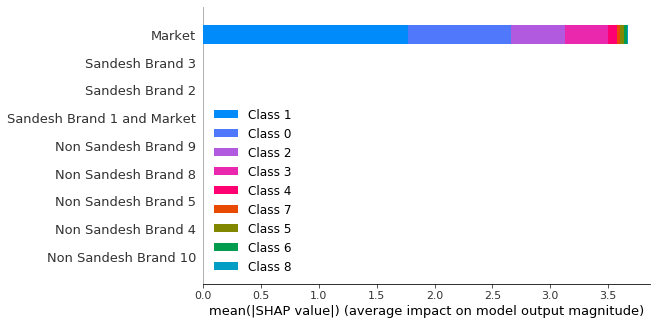

In [302]:
shap.summary_plot(shap_values2, x_train1)

In [ ]:
#analysis of second pivoted table

In [314]:
from sklearn.ensemble import RandomForestClassifier

my_model = RandomForestClassifier(random_state=1).fit(x_train3, training_scores_encoded1)

c:\users\shubham kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [315]:
clf = LogisticRegression()
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded1 = lab_enc.fit_transform(y_train3)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train3))
print(utils.multiclass.type_of_target(y_train3.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded1))


[2 0 0 0 0 3 0 5 1 4 0 0]
continuous
multiclass
multiclass


In [316]:
knn=clf.fit(x_train1, training_scores_encoded1)

c:\users\shubham kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shubham kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [317]:
row_to_show=1

In [322]:
data_for_prediction=x_test3.iloc[row_to_show]

In [324]:
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

In [325]:
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)